<a href="https://colab.research.google.com/github/mameaicha/gomycodeMAC/blob/main/Supervised_Learning_ClassificationCheckpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectif:
En utilisant l'ensemble de données du Titanic, nous allons  prédire si un passager survivra ou non en utilisant plusieurs algorithmes de classification de l'apprentissage supervisé. Nous commencerons par la régression logistique, le knn, puis l'arbre de décision et nous terminerons par la forêt aléatoire.

# Instalation, importation des paquets

In [1]:
# Make sure that we have the latest version of pandas-profiling.
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f2fd80b602806aefd3ec5a59efbbcab0217f960fe7105316c37d5e7abb61fab5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [2]:
!pip install -U graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import graphviz


import math as mt
import missingno as msno # for missing data

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Modelling Helpers
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import  Normalizer , scale

#from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_auc_score, roc_curve,classification_report

# profiling and data download
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file



# Téléchargement et lecture des  données

In [79]:
# load and read dataset
file_name = cache_file(
    "titanic-passengers.csv",
    "https://drive.google.com/u/0/uc?id=1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc&export=download",
)

data = pd.read_csv(file_name,sep=";")
# make a copy
df=data

# **Etape 1:  Analyse exploratoire des données (EDA)**


## a) Analyse de forme


In [5]:
# columns names
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
pd.set_option('display.max_column',111)
df.head(14)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


 **Identification de la variable Target**: 'Survived'

**Variables Description**:

'PassengerID' : ID of the Passenger.

'Survived': Survival (0 = No; 1 = Yes)

'Pclass': Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

'Name' : Name of the Passenger

'Sex': Sex of the Passenger (Female / Male)

'Age': Age of the Passenger.

'Sibsp': Number of siblings/spouses aboard

'Parch': Number of parents/children aboard

'Ticket' : Ticket number.

'Fare': Passenger fare (British pound)

'Cabin': Cabin number

'Embarked': Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


**Nombre de lignes et de colonnes**

In [21]:
# nomber of lines and columns
df.shape

(891, 12)

**Type des variables**

In [7]:
#types of variabl
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [8]:
df.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [9]:
num_feat = list(df.dtypes[df.dtypes != 'object'].index)
categ_feat = list(df.dtypes[df.dtypes == 'object'].index)
print("Categorical features:", categ_feat)
print("Numerical features:", num_feat)

Categorical features: ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical features: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Parfois  le type par defaut d'une variable peut ne pas correspondre avec la nature ou la fonction de celle-ci.  Il convient déslors de faire des reclassement des variable selon leur vrai type.

In [80]:

#classification or reclassification of variables according to type or function:
# view on https://www.kaggle.com/code/ozlemilgun/the-prediction-of-titanic-passengers-survival

def grab_col_names(dataframe, cat_th=5, car_th=20):
    """
    This function to perform the selection of numeric and categorical variables in the data set in a parametric way.
    Note: Variables with numeric data type but with categorical properties are included in categorical variables.

    Parameters
    ----------
    dataframe: dataframe
        The data set in which Variable types need to be parsed
    cat_th: int, optional
        The threshold value for number of distinct observations in numerical variables with categorical properties.
        cat_th is used to specify that if number of distinct observations in numerical variable is less than
        cat_th, this variables can be categorized as a categorical variable.

    car_th: int, optional
        The threshold value for categorical variables with  a wide range of cardinality.
        If the number of distinct observations in a categorical variables is greater than car_th, this
        variable can be categorized as a categorical variable.

    Returns
    -------
        cat_cols: list
            List of categorical variables.
        num_cols: list
            List of numerical variables.
        cat_but_car: list
            List of categorical variables with  a wide range of cardinality.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        Sum of elements in lists the cat_cols,num_cols  and  cat_but_car give the total number of variables in dataframe.
    """

    # cat cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and
                   dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and
                   dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and "ID" not in col.upper()]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols,num_cols,cat_but_car


In [81]:
grab_col_names(df)

(['Survived', 'Sex', 'Embarked', 'Pclass'],
 ['Age', 'SibSp', 'Parch', 'Fare'],
 ['Name', 'Ticket', 'Cabin'])

In [82]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


**Identification des valeurs manquantes**

In [22]:
# pourcentage de valeurs manquante
(df.isnull().sum() / df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

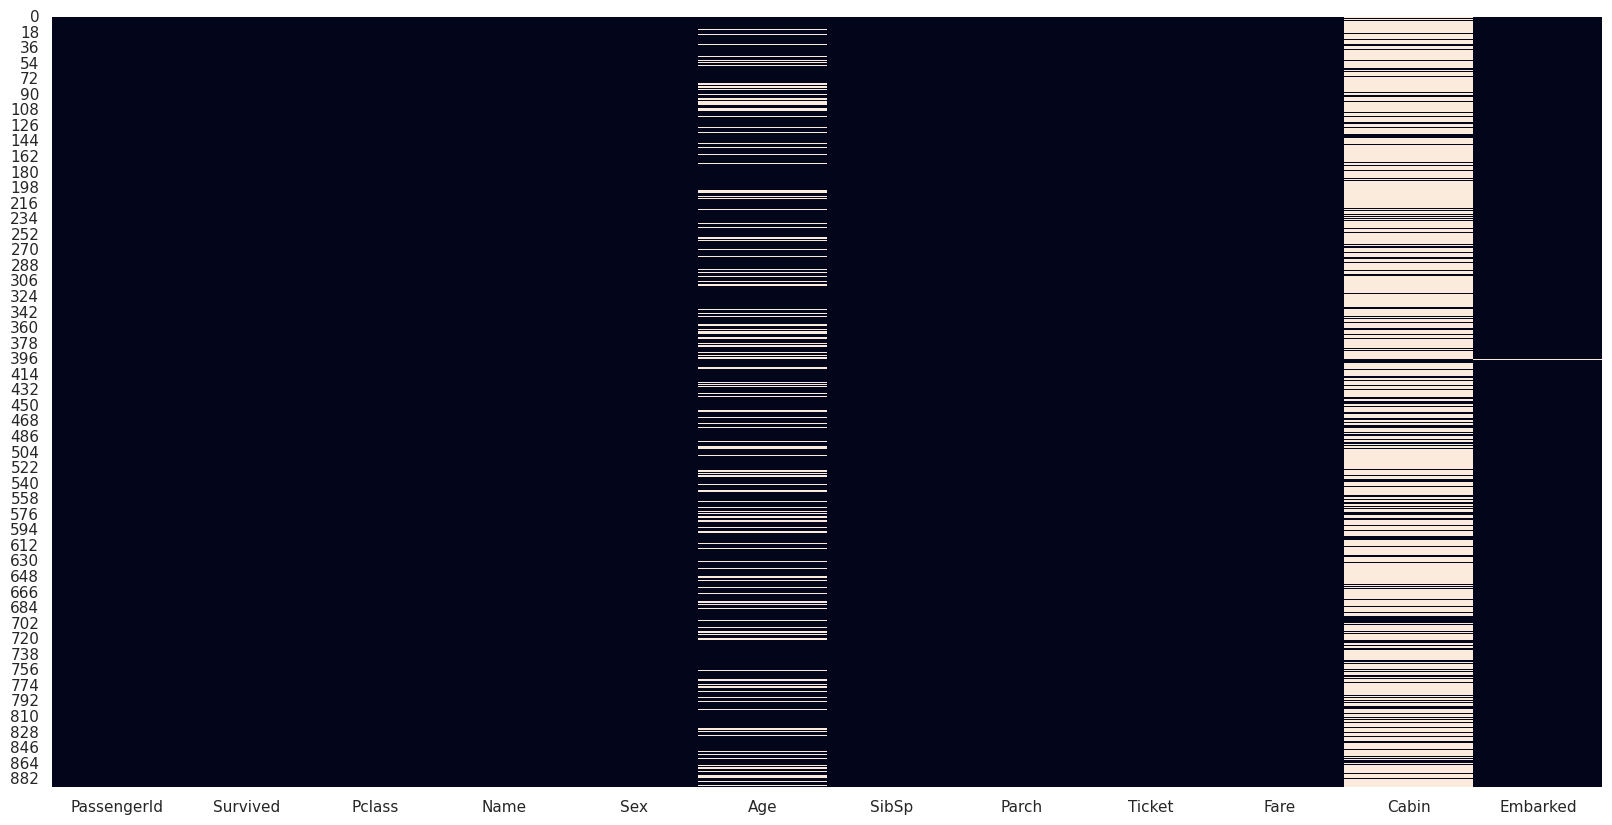

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

existance de valeurs manquante pour 'Age': 19.9%, 'Cabin': 77% et Embarked': 0.22

## b) Analyse de fond

**Visualisation des tous les variables**

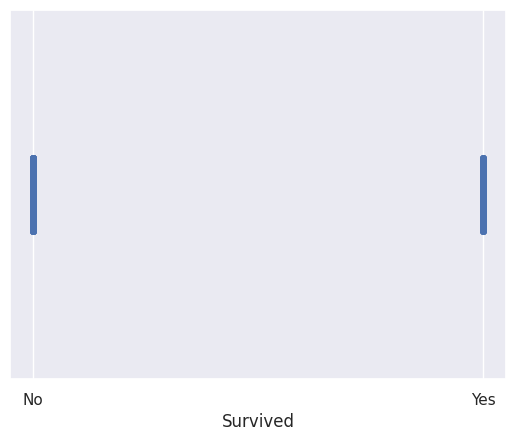

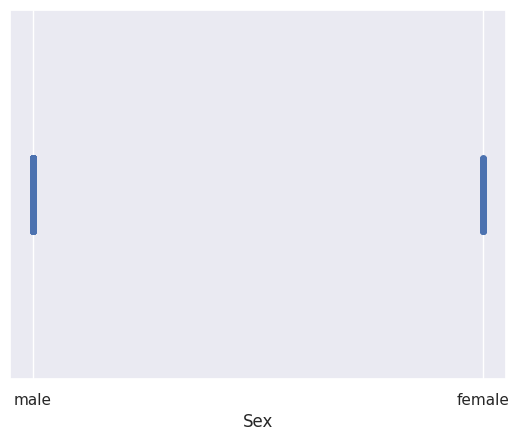

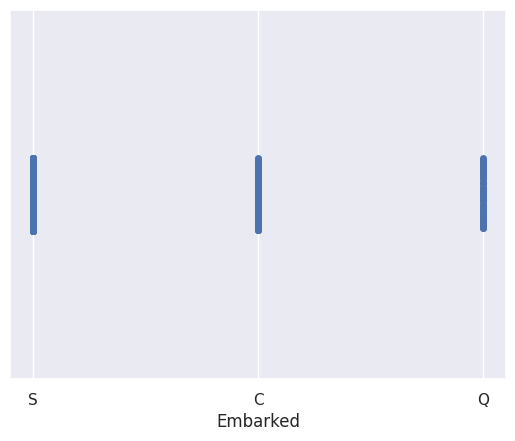

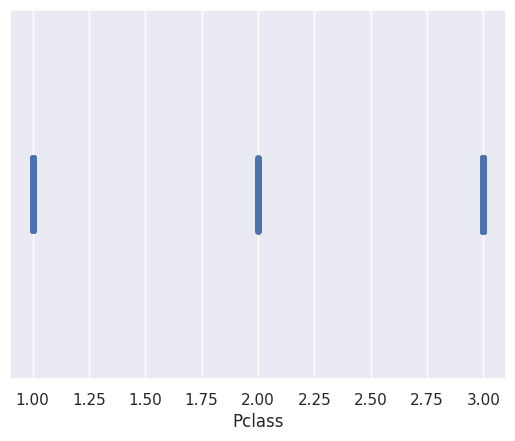

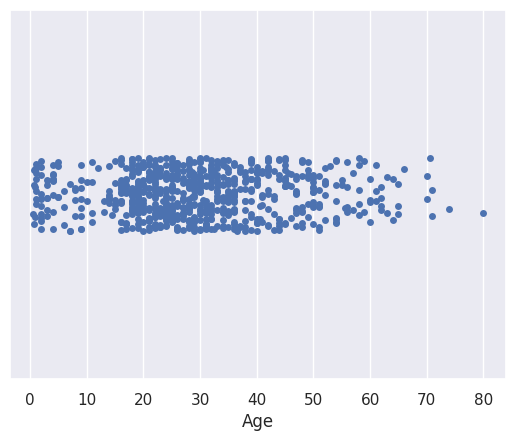

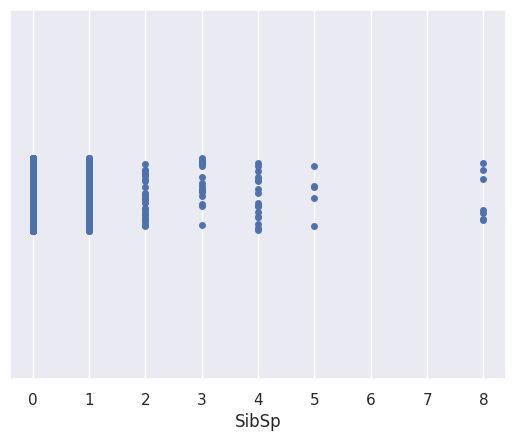

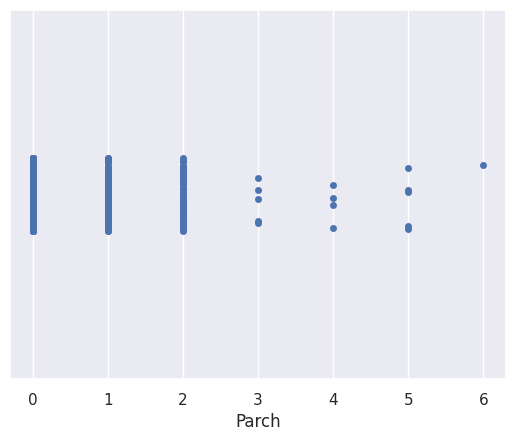

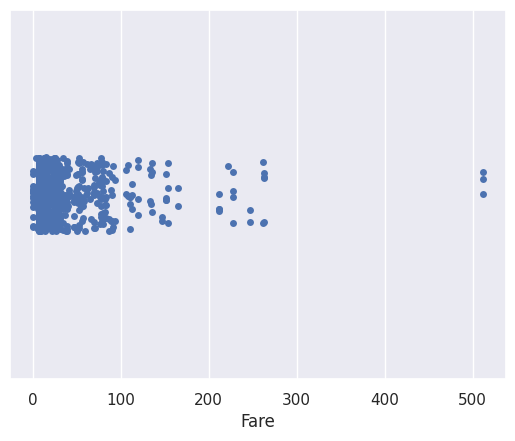

In [24]:

# represent all values on a pseudo point cloud. With striplot
for i, col in enumerate(cat_cols + num_cols):
    plt.figure(i)
    sns.stripplot(x = col, data = df, jitter = True)

In [25]:
 # General Exploration for Categorical Variables:

def cat_summary(dataframe, plot=False):
    for col_name in cat_cols:
        print("############## Unique Observations of Categorical Data ###############")
        print("The unique number of "+ col_name+": "+ str(dataframe[col_name].nunique()))

        print("############## Frequency of Categorical Data ########################")
        print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                            "Ratio": dataframe[col_name].value_counts()/len(dataframe)}))
        if plot == True:
            rgb_values = sns.color_palette("Set2", 6)
            sns.set_theme(style="darkgrid")
            ax = sns.countplot(x=dataframe[col_name], data=dataframe, palette=rgb_values)
            for p in ax.patches:
                ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
            plt.show()

############## Unique Observations of Categorical Data ###############
The unique number of Survived: 2
############## Frequency of Categorical Data ########################
     Survived     Ratio
No        549  0.616162
Yes       342  0.383838


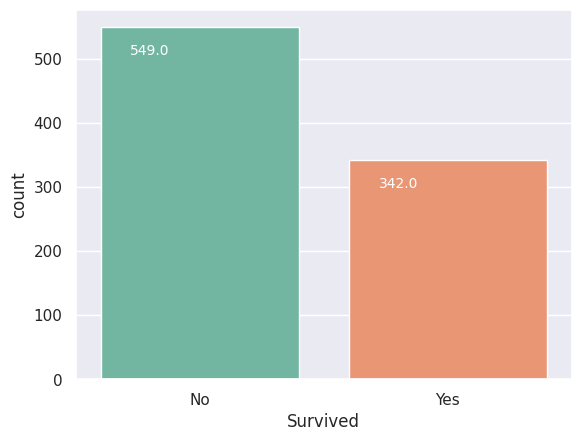

############## Unique Observations of Categorical Data ###############
The unique number of Sex: 2
############## Frequency of Categorical Data ########################
        Sex     Ratio
male    577  0.647587
female  314  0.352413


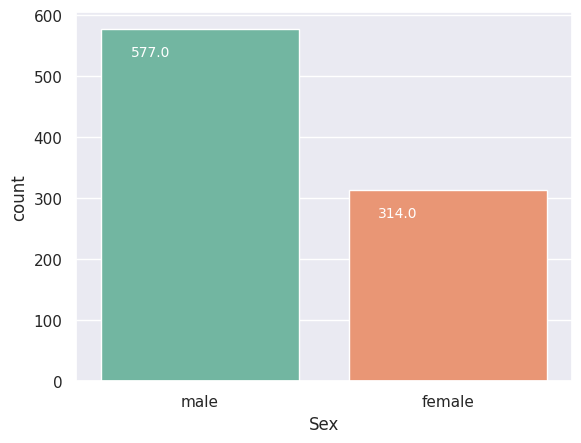

############## Unique Observations of Categorical Data ###############
The unique number of Embarked: 3
############## Frequency of Categorical Data ########################
   Embarked     Ratio
S       644  0.722783
C       168  0.188552
Q        77  0.086420


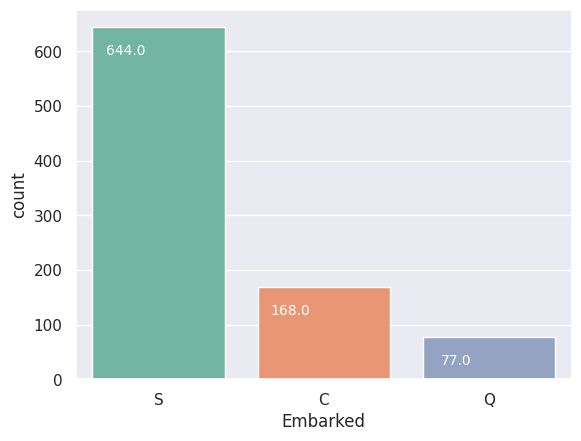

############## Unique Observations of Categorical Data ###############
The unique number of Pclass: 3
############## Frequency of Categorical Data ########################
   Pclass     Ratio
3     491  0.551066
1     216  0.242424
2     184  0.206510


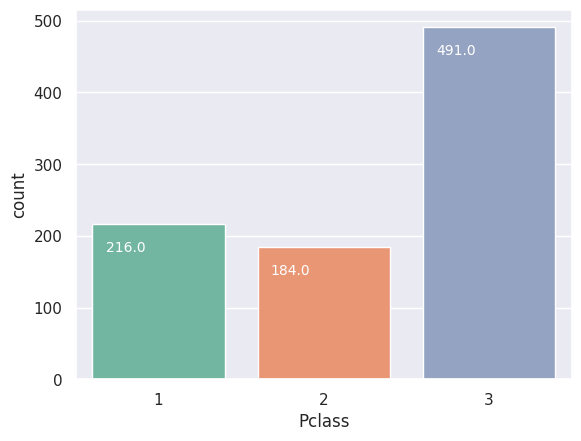

In [18]:
cat_summary(df, plot=True)

In [26]:
# General Exploration for Numerical Variables:

def num_summary(dataframe,  plot=False):
    quantiles = [0.25, 0.50, 0.75, 1]
    for col_name in num_cols:
        print("########## Summary Statistics of " +  col_name + " ############")
        print(dataframe[col_name].describe(quantiles).T)

        if plot:
            sns.histplot(data=dataframe, x=col_name  )
            plt.xlabel(col_name)
            plt.title("The distribution of "+ col_name)
            plt.grid(True)
            plt.show(block=True)

########## Summary Statistics of Age ############
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
100%      80.000000
max       80.000000
Name: Age, dtype: float64


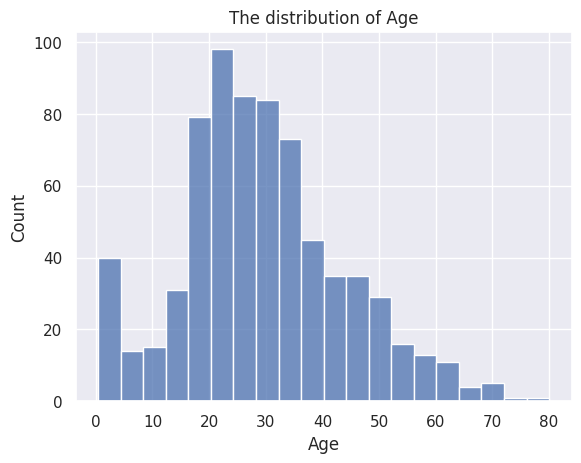

########## Summary Statistics of SibSp ############
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
100%       8.000000
max        8.000000
Name: SibSp, dtype: float64


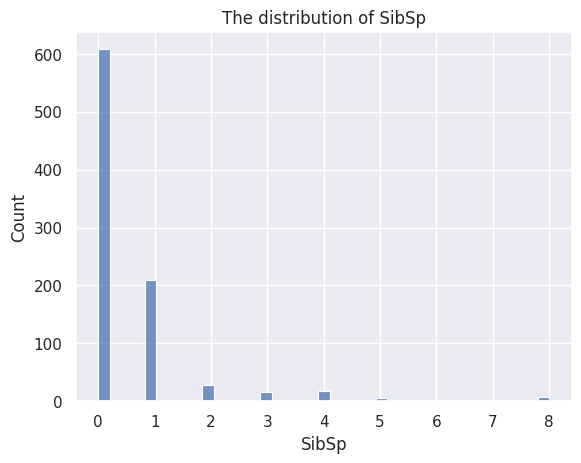

########## Summary Statistics of Parch ############
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
100%       6.000000
max        6.000000
Name: Parch, dtype: float64


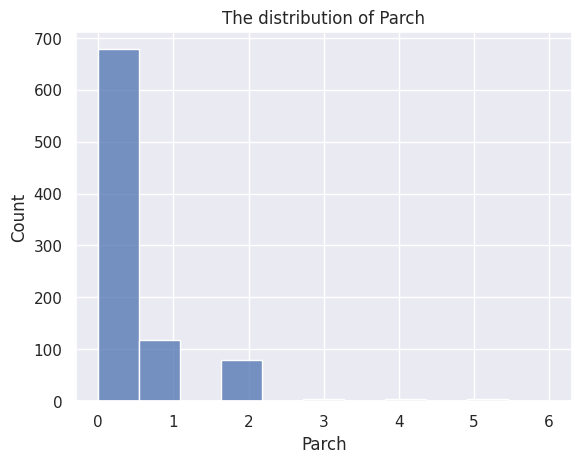

########## Summary Statistics of Fare ############
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
100%     512.329200
max      512.329200
Name: Fare, dtype: float64


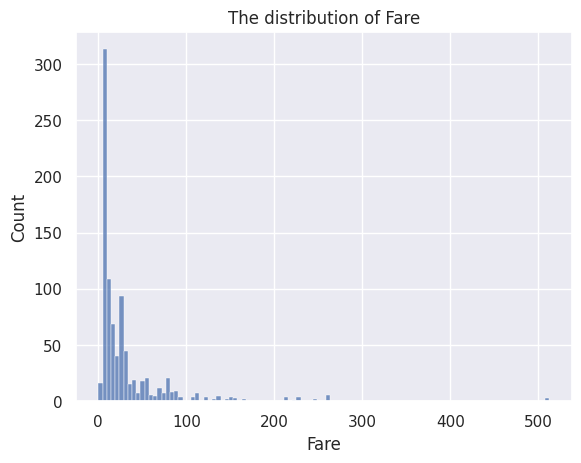

In [27]:
num_summary(df, plot=True)

**Visulation relation features-target**

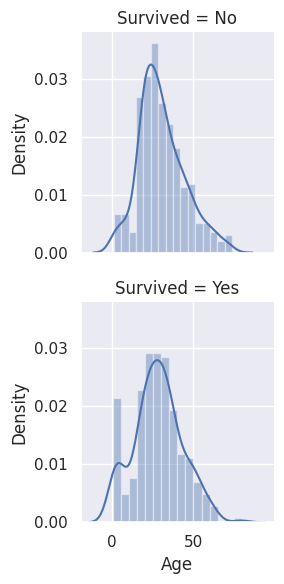

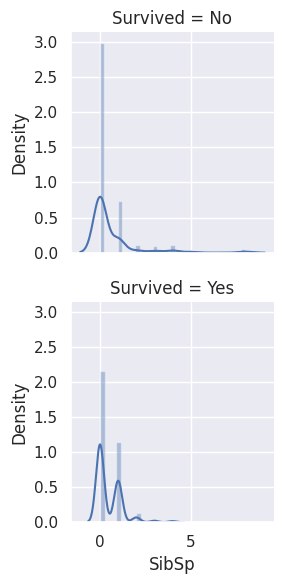

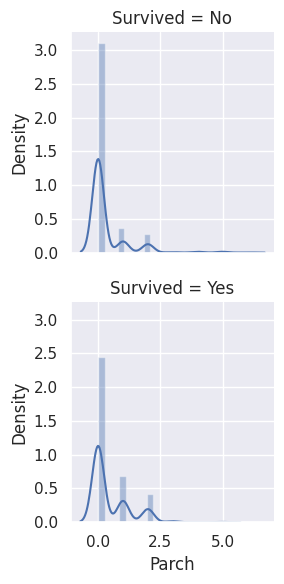

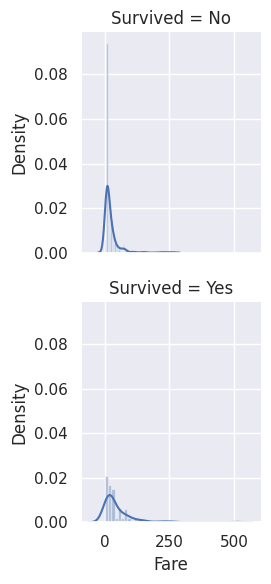

In [32]:
for col in num_cols:
  p = sns.FacetGrid(df, row = 'Survived')
  p.map(sns.distplot, col)

In [58]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""

    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

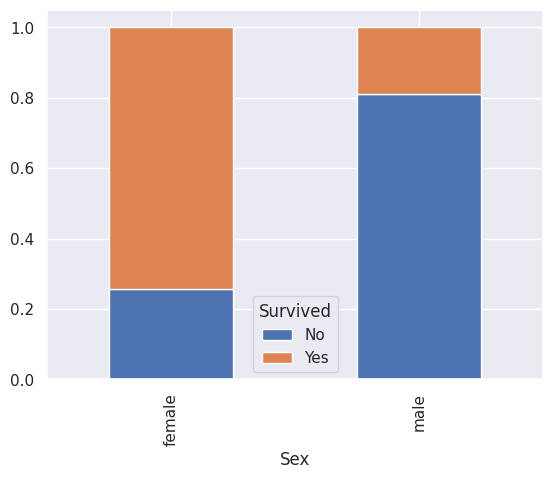

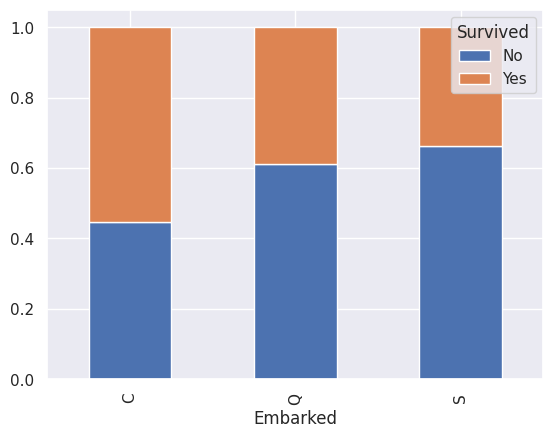

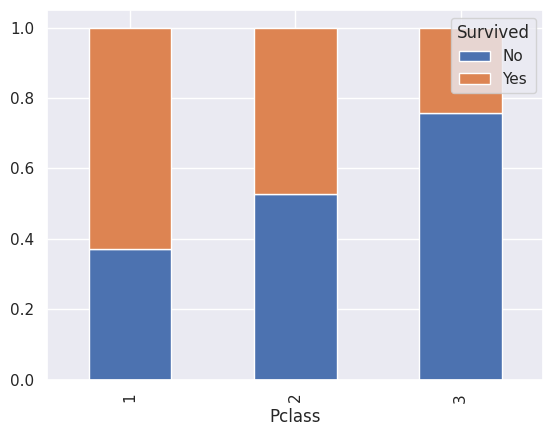

In [59]:
ll= cat_cols[:]
ll.remove('Survived')
for c in ll:
  plot_bar(df, c, 'Survived')
  plt.show()

# **Etape 2: Pre-processing**

-  **Features Engineering**

In [83]:
# Only passengers have cabin numbers, so "Deck" feature can be extracted by using Cabin feature:
df['Deck'] = df["Cabin"].notnull().astype('int')

# Name word count
df["Name_Word_Count"] = df["Name"].apply(lambda x: len(str(x).split(" ")))

# Name that includes "Dr"
df["Name_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr. ")]))

# Family size:
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1

# Fare per passenger:
df['Fare_Per_Person'] = df['Fare'] / (df['Family_Size'])

# status: from "Name" feature extract the status
df['status'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Ticket:
df['Ticket'] = df['Ticket'].str.isalnum().astype('int')

# Age & Pclass
df["Age_Pclass"] = df["Age"] * df["Pclass"]

# Is Alone?
df["Is_Alone"] = np.where(df['SibSp'] + df['Parch'] > 0, "No", "Yes")

# Age Level
df.loc[(df['Age'] < 18), 'Age_Cat'] = 'Young'
df.loc[(df['Age'] >= 18) & (df['Age'] < 56), 'Age_Cat'] = 'Mature'
df.loc[(df['Age'] >= 56), 'Age_Cat'] = 'Senior'

 # Age & Sex
df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'Sex_Cat'] = 'Young_Male'
df.loc[(df['Sex'] == 'male') & ((df['Age'] > 21) & (df['Age']) < 50), 'Sex_Cat'] = 'Mature_Male'
df.loc[(df['Sex'] == 'male') & (df['Age'] > 50), 'Sex_Cat'] = 'Senior_Male'
df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'Sex_Cat'] = 'Young_Female'
df.loc[(df['Sex'] == 'female') & ((df['Age'] > 21) & (df['Age']) < 50), 'Sex_Cat'] = 'Mature_Female'
df.loc[(df['Sex'] == 'female') & (df['Age'] > 50), 'Sex_Cat'] = 'Senior_Female'

In [61]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck',
       'Name_Word_Count', 'Name_DR', 'Family_Size', 'Fare_Per_Person',
       'status', 'Age_Pclass', 'Is_Alone', 'Age_Cat', 'Sex_Cat'],
      dtype='object')

In [62]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Name_Word_Count,Name_DR,Family_Size,Fare_Per_Person,status,Age_Pclass,Is_Alone,Age_Cat,Sex_Cat
120,883,No,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,1,10.5167,NaN,S,0,4,0,1,10.5167,Miss,66.0,Yes,Mature,Mature_Female
97,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,0,23.4500,NaN,S,0,5,0,4,5.8625,Miss,NaN,No,NaN,Mature_Female
259,361,No,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,1,27.9000,NaN,S,0,3,0,6,4.6500,Mr,120.0,No,Mature,Mature_Male


- **Suppression de colonnes inutiles**

In [84]:
df.drop(columns=["PassengerId","Name",'Ticket',  'Cabin'], axis=1, inplace=True)

- **Traitement des données manquantes**

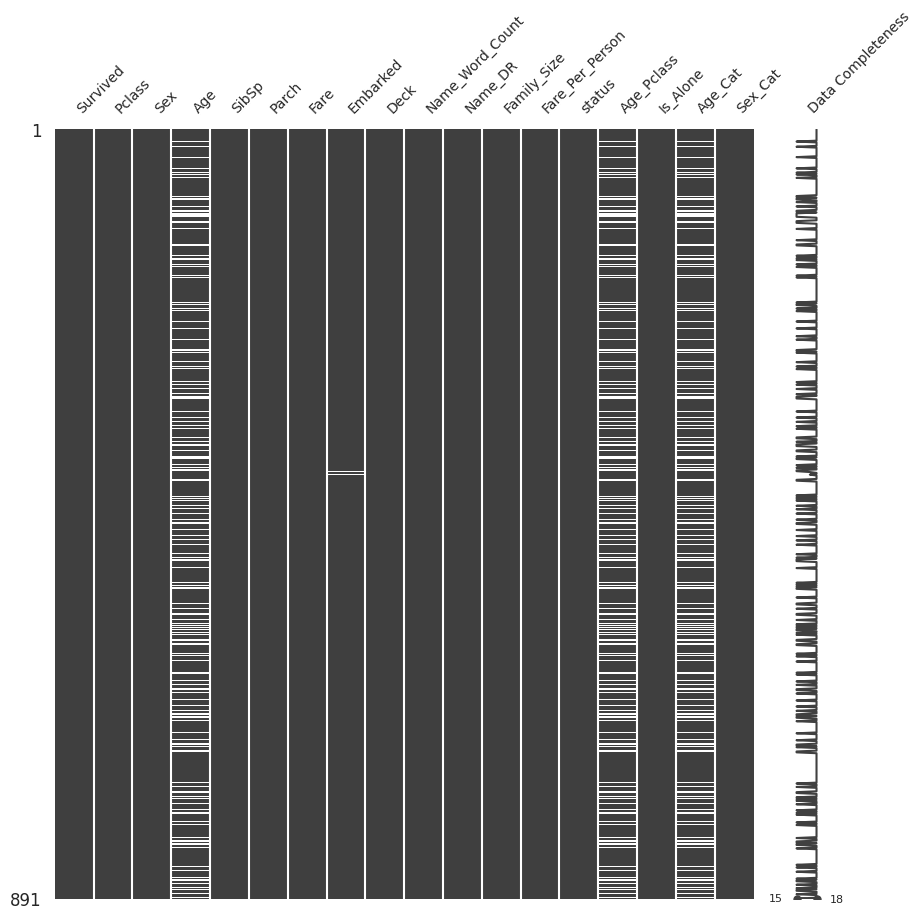

In [64]:
msno.matrix(df, figsize=(10,10), fontsize=10, labels=8)
plt.show()

Si  les valeurs manquantes sont aléatoires alors  les valeurs NaN peuvent être supprimées ou remplies. Dans le cas contraire, l'application des opérations de remplissage/suppression brisera la structure de l'ensemble de données.

Donc verifions d'abor s'il y a nulité de correlation entre les variables.

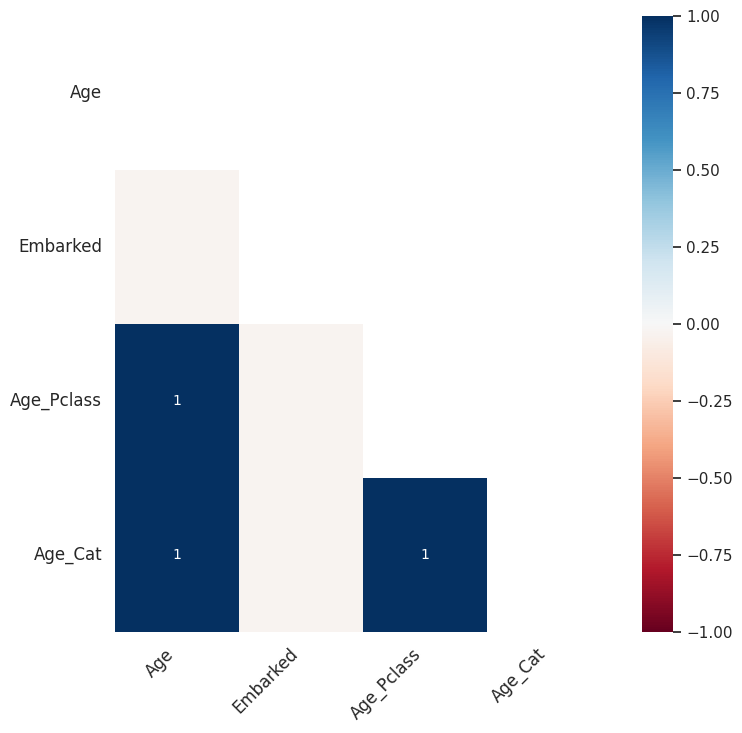

In [65]:
msno.heatmap(df, figsize=(8,8), fontsize=12)
plt.show()

Les deux graphiques ci-dessus  montrent qu'il n'y a pas de "corrélation de nullité" entre les variables autres que les variables dérivées les unes des autres (etc. âge).

Par consequant, nous pouvons appliquer des opérations de remplissage ou suppression de valeurs manquantes.

In [66]:
# Check the features containing NaN values:

def missing_values_df(dataframe, na_col_name=False):
    na_cols = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    na_cols_number = dataframe[na_cols].isnull().sum()
    na_cols_ratio = dataframe[na_cols].isnull().sum() / dataframe.shape[0]
    missing_values_table = pd.DataFrame({"Missing_Values (#)": na_cols_number, \
                                         "Ratio (%)": na_cols_ratio * 100,
                                         "Type" : dataframe[na_cols].dtypes})
    print(missing_values_table)
    print("************* Number of Missing Values *************")
    print(dataframe.isnull().sum().sum())
    if na_col_name:
        print("************* Nullable variables *************")
        return na_cols


In [85]:
missing_values_df(df)

            Missing_Values (#)  Ratio (%)     Type
Age                        177  19.865320  float64
Embarked                     2   0.224467   object
Age_Pclass                 177  19.865320  float64
Age_Cat                    177  19.865320   object
************* Number of Missing Values *************
533


In [86]:
# remplissage des donnes quategorielle manquante par la mode
def missing_cat_cols_fill(dataframe):
    na_cols = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0 and dataframe[col].dtype == "O"]
    for col in na_cols:
        dataframe[col] = dataframe[col].fillna(dataframe[col].mode()[0])
        return dataframe.head()

In [87]:
missing_cat_cols_fill(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Name_Word_Count,Name_DR,Family_Size,Fare_Per_Person,status,Age_Pclass,Is_Alone,Age_Cat,Sex_Cat
0,No,2,male,28.0,0,0,13.0000,S,0,4,0,1,13.0000,Mr,56.0,Yes,Mature,Mature_Male
1,No,3,male,25.0,0,0,7.6500,S,1,4,0,1,7.6500,Mr,75.0,Yes,Mature,Mature_Male
2,No,3,male,20.0,0,0,7.8542,S,0,4,0,1,7.8542,Mr,60.0,Yes,Mature,Mature_Male
3,No,3,female,29.0,0,4,21.0750,S,0,6,0,5,4.2150,Mrs,87.0,No,Mature,Mature_Female
4,No,1,male,31.0,1,0,52.0000,S,1,3,0,2,26.0000,Mr,31.0,No,Mature,Mature_Male


In [88]:
missing_values_df(df)

            Missing_Values (#)  Ratio (%)     Type
Age                        177   19.86532  float64
Age_Pclass                 177   19.86532  float64
Age_Cat                    177   19.86532   object
************* Number of Missing Values *************
531


In [89]:
def observe_missing_values(dataframe, na_col, related_col, target, target_method="mean", na_col_method="median"):
    print(dataframe.groupby(related_col).agg({target : target_method,
                                               na_col : na_col_method}))

In [90]:
#encodage de la target pour corriger les erreurs
#cleanup_sex={"Sex":{"male":0, "female":1}}
cleanup_Survived={"Survived":{"No":0, "Yes":1}}
#df.replace(cleanup_sex, inplace=True)
df.replace(cleanup_Survived, inplace=True)

In [91]:
cat_cols = [col for col in cat_cols if col not in "Survived"]
for col in cat_cols:
    observe_missing_values(df, "Age",col,"Survived")

        Survived   Age
Sex                   
female  0.742038  27.0
male    0.188908  29.0
          Survived   Age
Embarked                
C         0.553571  29.0
Q         0.389610  27.0
S         0.339009  28.0
        Survived   Age
Pclass                
1       0.629630  37.0
2       0.472826  29.0
3       0.242363  24.0


In [92]:
# nous pouvons supprimer  "Name_DR"
df.drop(columns="Name_DR",axis=1, inplace=True)

In [93]:
# remplissage des donnees manquante de Age par cotegorie "Title" en utilisant la mediane
df["Age"] = df["Age"].fillna(df.groupby("status")["Age"].transform("median"))

In [94]:
## mise a jour des variables dérivees de 'Age':
# Age et Pclass
df["Age_Pclass"] = df["Age"] * df["Pclass"]

# Is Alone?
df["Is_Alone"] = np.where(df['SibSp'] + df['Parch'] > 0, "No", "Yes")

# Age Level
df.loc[(df['Age'] < 18), 'Age_Cat'] = 'Young'
df.loc[(df['Age'] >= 18) & (df['Age'] < 56), 'Age_Cat'] = 'Mature'
df.loc[(df['Age'] >= 56), 'Age_Cat'] = 'Senior'

 # Age & Sex
df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'Sex_Cat'] = 'Young_Male'
df.loc[(df['Sex'] == 'male') & ((df['Age'] > 21) & (df['Age']) < 50), 'Sex_Cat'] = 'Mature_Male'
df.loc[(df['Sex'] == 'male') & (df['Age'] > 50), 'Sex_Cat'] = 'Senior_Male'
df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'Sex_Cat'] = 'Young_Female'
df.loc[(df['Sex'] == 'female') & ((df['Age'] > 21) & (df['Age']) < 50), 'Sex_Cat'] = 'Mature_Female'
df.loc[(df['Sex'] == 'female') & (df['Age'] > 50), 'Sex_Cat'] = 'Senior_Female'


In [95]:
missing_values_df(df)

Empty DataFrame
Columns: [Missing_Values (#), Ratio (%), Type]
Index: []
************* Number of Missing Values *************
0


Donc il n'y a plus de données manquantes

-  **Detection des Outlier**:

In [96]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    Q1 = dataframe[col_name].quantile(q1)
    Q3 = dataframe[col_name].quantile(q3)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR

    return low_limit, up_limit


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [ ]:
for col in num_cols:
    print(col,":",outlier_thresholds(df,col))

Age : (0.0, 56.0)
SibSp : (-1.5, 2.5)
Parch : (0.0, 0.0)
Fare : (-26.724, 65.6344)
Name_Word_Count : (1.5, 5.5)
Family_Size : (-0.5, 3.5)
Fare_Per_Person : (-17.375, 48.29166666666667)
Age_Pclass : (-35.0, 165.0)


In [97]:
# Showing Outliers with Boxplot:

def check_outlier(dataframe, q1=0.25, q3=0.75):
    for col_name in num_cols:
        low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
        if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
            sns.boxplot(x=dataframe[col_name])
            plt.show()
        else:
            return False

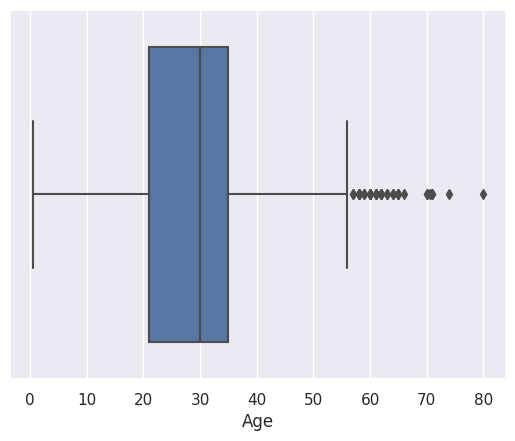

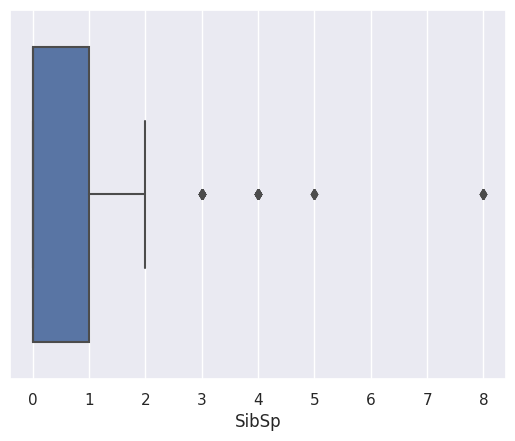

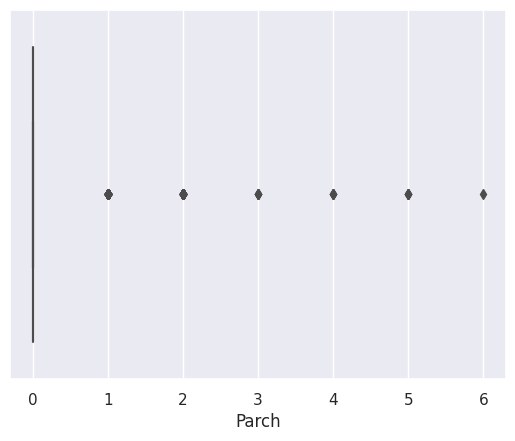

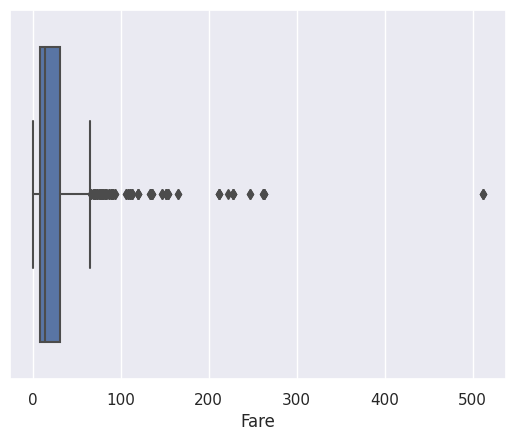

In [98]:
check_outlier(df)

La valeur maximale de l'âge dans l'ensemble de données semble être de 80 ans, alors qu'il ne s'agit pas d'une situation impossible. Cette valeur ne peut donc pas être considérée comme une valeur aberrante pour l'ensemble de données concerné.

Si nous examinons les valeurs limites supérieures et inférieures pour d'autres variables et les considérons de ce point de vue, nous pouvons revérifier les valeurs aberrantes en remplaçant la valeur q1 par 0,05 et la valeur q3 par 0,95.

Dans les étapes suivantes, nous examinerons si les variables forment ensemble une valeur aberrante en utilisant le facteur de valeur aberrante locale (LOF).

In [99]:
check_outlier(df, q1=0.05, q3=0.95)

False

     - Local Outlier Factor

In [100]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
df_num = df[num_cols]

In [101]:
df_num.head()

,Age,SibSp,Parch,Fare,Name_Word_Count,Family_Size,Fare_Per_Person,Age_Pclass
0,28.0,0,0,13.0000,4,1,13.0000,56.0
1,25.0,0,0,7.6500,4,1,7.6500,75.0
2,20.0,0,0,7.8542,4,1,7.8542,60.0
3,29.0,0,4,21.0750,6,5,4.2150,87.0
4,31.0,1,0,52.0000,3,2,26.0000,31.0


In [102]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df_num)
df_scores = clf.negative_outlier_factor_
df_scores[0:5]

array([-0.97606104, -0.97844231, -1.74899002, -1.18845996, -0.98230607])

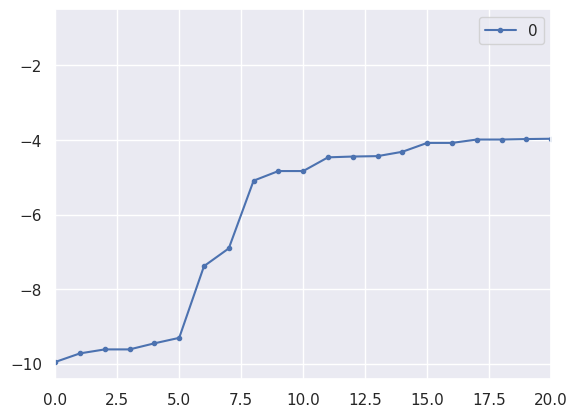

In [103]:
# Visualization:

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [104]:
# Let's determine the threshold by using Elbow Method

th = np.sort(df_scores)[8]

df[df_scores < th]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Name_Word_Count,Family_Size,Fare_Per_Person,status,Age_Pclass,Is_Alone,Age_Cat,Sex_Cat
65,0,3,female,31.0,0,0,7.8542,S,0,3,1,7.8542,Miss,93.0,Yes,Mature,Mature_Female
155,0,3,male,31.0,0,0,7.7500,Q,0,3,1,7.7500,Mr,93.0,Yes,Mature,Mature_Male
176,0,3,male,29.0,0,0,8.0500,S,0,3,1,8.0500,Mr,87.0,Yes,Mature,Mature_Male
240,0,3,male,29.0,0,0,7.8750,S,0,3,1,7.8750,Mr,87.0,Yes,Mature,Mature_Male
248,1,3,male,31.0,0,0,7.9250,S,0,3,1,7.9250,Mr,93.0,Yes,Mature,Mature_Male
308,1,3,male,29.0,0,0,7.8958,C,0,3,1,7.8958,Mr,87.0,Yes,Mature,Mature_Male
382,0,3,female,30.5,0,0,7.7500,Q,0,3,1,7.7500,Miss,91.5,Yes,Mature,Mature_Female
725,1,3,female,31.0,0,0,8.6833,S,0,3,1,8.6833,Mrs,93.0,Yes,Mature,Mature_Female


In [105]:
# suppression des outliers
df.drop(df[df_scores < th].index, inplace=True)

In [106]:
df.shape

(883, 17)

- **Encodage**

    -  Label Encoding:

In [107]:
# Defining binary cols:

def binary_cols(dataframe):
    binary_col_names = [col for col in dataframe.columns if ((dataframe[col].dtype == "O") and (dataframe[col].nunique() == 2))]
    return binary_col_names

In [108]:
binary_col_names = binary_cols(df)
binary_col_names


['Sex', 'Is_Alone']

In [109]:
# Label Encoding:

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [110]:
for col in binary_col_names:
    label_encoder(df, col)

In [111]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Name_Word_Count,Family_Size,Fare_Per_Person,status,Age_Pclass,Is_Alone,Age_Cat,Sex_Cat
0,0,2,1,28.0,0,0,13.0000,S,0,4,1,13.0000,Mr,56.0,1,Mature,Mature_Male
1,0,3,1,25.0,0,0,7.6500,S,1,4,1,7.6500,Mr,75.0,1,Mature,Mature_Male
2,0,3,1,20.0,0,0,7.8542,S,0,4,1,7.8542,Mr,60.0,1,Mature,Mature_Male
3,0,3,0,29.0,0,4,21.0750,S,0,6,5,4.2150,Mrs,87.0,0,Mature,Mature_Female
4,0,1,1,31.0,1,0,52.0000,S,1,3,2,26.0000,Mr,31.0,0,Mature,Mature_Male


    - Rare Encoding

Examinons les fréquences de classe des variables catégorielles. Si la distribution de classe de ces variables est inférieure à 1 %, nous pouvons les classer dans la catégorie "Rare".

In [112]:
def rare_analyser(dataframe, target):
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    cat_cols = [col for col in cat_cols if  col != target in cat_cols]

    for col in cat_cols:
        print(col, ":", dataframe[col].nunique())
        print("dtype:", dataframe[col].dtype)
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(), \
                            "RATIO (%)": dataframe[col].value_counts() / dataframe.shape[0], \
                            "TARGET_MEAN (%) ": dataframe.groupby(col)[target].mean() * 100}))

In [113]:
rare_analyser(df, "Survived")

Embarked : 3
dtype: object
   COUNT  RATIO (%)  TARGET_MEAN (%) 
C    167   0.189128         55.089820
Q     75   0.084938         40.000000
S    641   0.725934         33.853354
status : 17
dtype: object
          COUNT  RATIO (%)  TARGET_MEAN (%) 
Capt          1   0.001133          0.000000
Col           2   0.002265         50.000000
Countess      1   0.001133        100.000000
Don           1   0.001133          0.000000
Dr            7   0.007928         42.857143
Jonkheer      1   0.001133          0.000000
Lady          1   0.001133        100.000000
Major         2   0.002265         50.000000
Master       40   0.045300         57.500000
Miss        180   0.203851         70.555556
Mlle          2   0.002265        100.000000
Mme           1   0.001133        100.000000
Mr          512   0.579841         15.429688
Mrs         124   0.140430         79.032258
Ms            1   0.001133        100.000000
Rev           6   0.006795          0.000000
Sir           1   0.001133    

In [114]:
# Rare Encoder:

def rare_encoder(dataframe, rare_perc=0.0100):
    rare_df = dataframe.copy()

    rare_columns = [col for col in rare_df.columns if rare_df[col].dtypes == 'O'
                    and (rare_df[col].value_counts() / rare_df.shape[0] <= rare_perc).any(axis=None)]

    for col in rare_columns:
        tmp = rare_df[col].value_counts() / rare_df.shape[0]
        rare_labels = tmp[tmp <= rare_perc].index
        rare_df[col] = np.where(rare_df[col].isin(rare_labels), 'Rare', rare_df[col])

    return rare_df

In [115]:
new_df = rare_encoder(df)

In [116]:
rare_analyser(new_df, "Survived")

Embarked : 3
dtype: object
   COUNT  RATIO (%)  TARGET_MEAN (%) 
C    167   0.189128         55.089820
Q     75   0.084938         40.000000
S    641   0.725934         33.853354
status : 5
dtype: object
        COUNT  RATIO (%)  TARGET_MEAN (%) 
Master     40   0.045300         57.500000
Miss      180   0.203851         70.555556
Mr        512   0.579841         15.429688
Mrs       124   0.140430         79.032258
Rare       27   0.030578         44.444444
Age_Cat : 3
dtype: object
        COUNT  RATIO (%)  TARGET_MEAN (%) 
Mature    727   0.823330         36.313618
Senior     39   0.044168         30.769231
Young     117   0.132503         53.846154
Sex_Cat : 4
dtype: object
               COUNT  RATIO (%)  TARGET_MEAN (%) 
Mature_Female    294   0.332956         73.469388
Mature_Male      525   0.594564         19.238095
Senior_Female     17   0.019253         94.117647
Senior_Male       47   0.053228         12.765957
Pclass : 3
dtype: int64
   COUNT  RATIO (%)  TARGET_MEAN (%) 
1 

Étant donné que les variables à 2 classes dont la fréquence est inférieure à 1 % ne contiennent aucune information, nous pouvons supprimer ces variables.

In [117]:
def useless_cols(dataframe, rare_perc=0.01):
    useless_cols = [col for col in dataframe.columns if dataframe[col].nunique() == 2
                    and (dataframe[col].value_counts() / len(dataframe) <= rare_perc).any(axis=None)]
    new_df = dataframe.drop(useless_cols, axis=1)
    return useless_cols

In [118]:
 #It has been observed that there is no variable which can be considered as useless variable.

useless_cols(new_df)

[]

    - One-Hot-Encoding

In [119]:
def ohe_cols(dataframe):
    ohe_cols = [col for col in dataframe.columns if (dataframe[col].dtype == "O" and 10 >= dataframe[col].nunique() > 2)]
    return ohe_cols

In [120]:
ohe_col_names = ohe_cols(new_df)

In [121]:
def one_hot_encoder(dataframe, ohe_col_names, drop_first=True):
    dms = pd.get_dummies(dataframe[ohe_col_names], drop_first=drop_first)
    df_ = dataframe.drop(columns=ohe_col_names, axis=1)
    dataframe = pd.concat([df_, dms],axis=1)
    return dataframe

In [122]:
new_df = one_hot_encoder(new_df, ohe_col_names)

In [123]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Name_Word_Count,Family_Size,Fare_Per_Person,Age_Pclass,Is_Alone,Embarked_Q,Embarked_S,status_Miss,status_Mr,status_Mrs,status_Rare,Age_Cat_Senior,Age_Cat_Young,Sex_Cat_Mature_Male,Sex_Cat_Senior_Female,Sex_Cat_Senior_Male
0,0,2,1,28.0,0,0,13.0000,0,4,1,13.0000,56.0,1,0,1,0,1,0,0,0,0,1,0,0
1,0,3,1,25.0,0,0,7.6500,1,4,1,7.6500,75.0,1,0,1,0,1,0,0,0,0,1,0,0
2,0,3,1,20.0,0,0,7.8542,0,4,1,7.8542,60.0,1,0,1,0,1,0,0,0,0,1,0,0
3,0,3,0,29.0,0,4,21.0750,0,6,5,4.2150,87.0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,1,1,31.0,1,0,52.0000,1,3,2,26.0000,31.0,0,0,1,0,1,0,0,0,0,1,0,0


- **Feature Scaling : Normalisation et standardisation**

In [124]:
cat_cols, num_cols, cat_but_car = grab_col_names(new_df)

In [125]:
num_cols

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Name_Word_Count',
 'Family_Size',
 'Fare_Per_Person',
 'Age_Pclass']

In [126]:
scaler = StandardScaler()
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

- **Correlation**

In [127]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.75):
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    cor_matrix = dataframe[num_cols].corr().abs()
    #corr = dataframe.corr()
    #cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (12, 12)})
        sns.set(font_scale=1)
        sns.heatmap(cor_matrix, cmap="RdBu",annot=True)
        plt.show()
    return drop_list


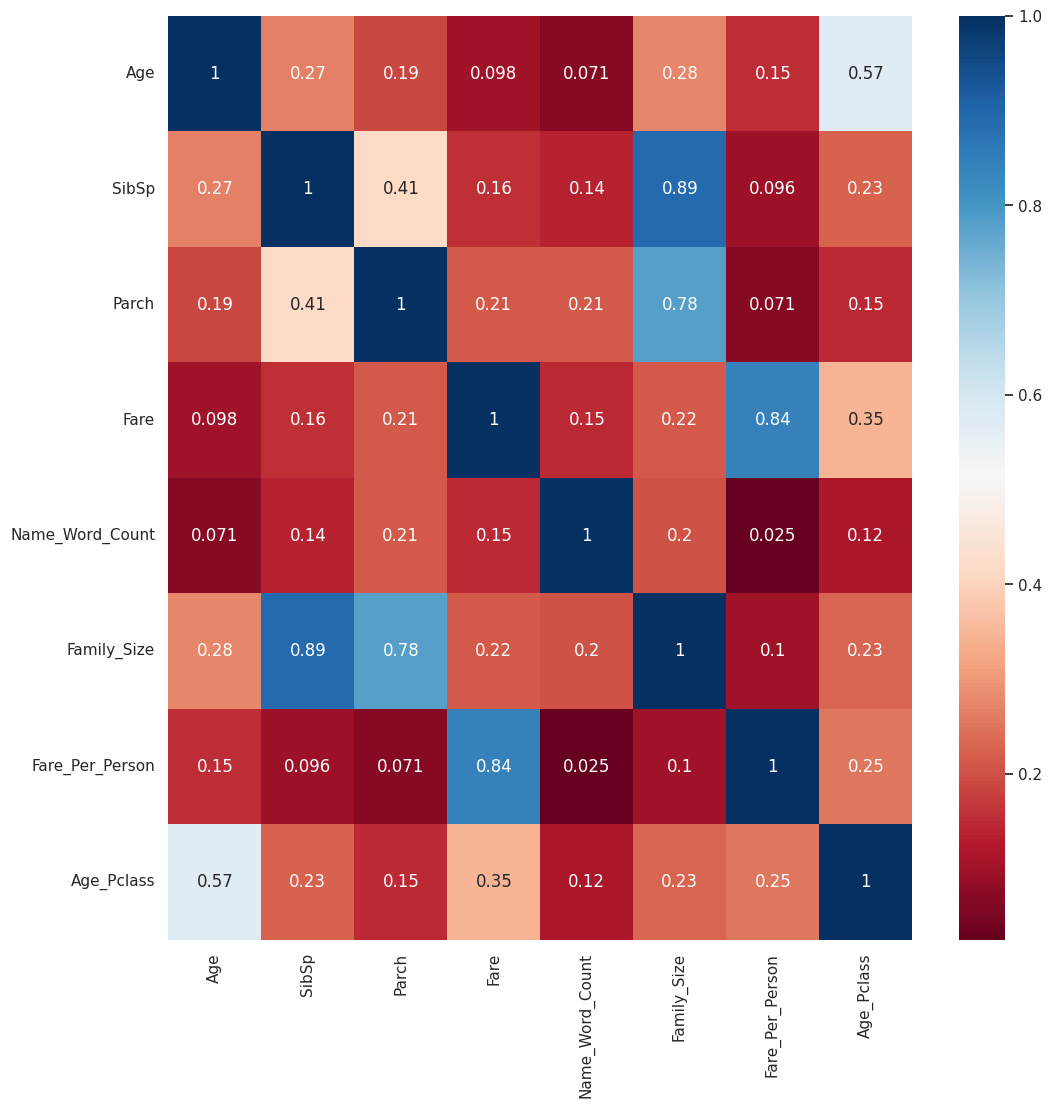

['Family_Size', 'Fare_Per_Person']

In [128]:
high_correlated_cols(new_df, plot=True)

In [129]:
drop_list = ["Fare","SibSp","Parch"]

# drop_list = high_correlated_cols(new_df)

In [130]:
new_df = new_df.drop(drop_list, axis=1)

In [131]:
new_df.head()

,Survived,Pclass,Sex,Age,Deck,Name_Word_Count,Family_Size,Fare_Per_Person,Age_Pclass,Is_Alone,Embarked_Q,Embarked_S,status_Miss,status_Mr,status_Mrs,status_Rare,Age_Cat_Senior,Age_Cat_Young,Sex_Cat_Mature_Male,Sex_Cat_Senior_Female,Sex_Cat_Senior_Male
0,0,2,1,-0.103848,0,-0.065875,-0.564315,-0.195318,-0.233108,1,0,1,0,1,0,0,0,0,1,0,0
1,0,3,1,-0.329120,1,-0.065875,-0.564315,-0.344074,0.342962,1,0,1,0,1,0,0,0,0,1,0,0
2,0,3,1,-0.704571,0,-0.065875,-0.564315,-0.338396,-0.111830,1,0,1,0,1,0,0,0,0,1,0,0
3,0,3,0,-0.028758,0,1.644926,1.908590,-0.439584,0.706796,0,0,1,0,0,1,0,0,0,0,0,0
4,0,1,1,0.121423,1,-0.921275,0.053911,0.166146,-0.991094,0,0,1,0,1,0,0,0,0,1,0,0


In [132]:
# Since different variables related to the "AGE" variable are derived, the "AGE" variable will be excluded and the modeling stage will be started.

new_df = new_df.drop(columns="Age",axis=1)

- **Creation Train set / Test set**

In [135]:
X = new_df.drop(columns="Survived",axis=1)
y = new_df[["Survived"]]

#splitting data with test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)


# **Etape 3: Modelisation**


## Part 1 Logistic Regression

   - 1. Apply logistic regression.

In [136]:
logReg_model = LogisticRegression()
# Model Training
logReg_model.fit(X_train,y_train)
# Prediction
y_pred = logReg_model.predict(X_test)


- 2. Use confusion matrix to validate your model.

In [141]:
# Accuracy Score:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

# Precision:
print("Precision Score:", precision_score(y_test,y_pred))

# Recall:
print("Recall Score:" ,recall_score(y_test,y_pred))

# F1 Score:
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy Score: 0.832579185520362
Precision Score: 0.7941176470588235
Recall Score: 0.8350515463917526
F1 Score: 0.8140703517587939


In [142]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[103,  21],
       [ 16,  81]])

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       124
           1       0.79      0.84      0.81        97

    accuracy                           0.83       221
   macro avg       0.83      0.83      0.83       221
weighted avg       0.83      0.83      0.83       221



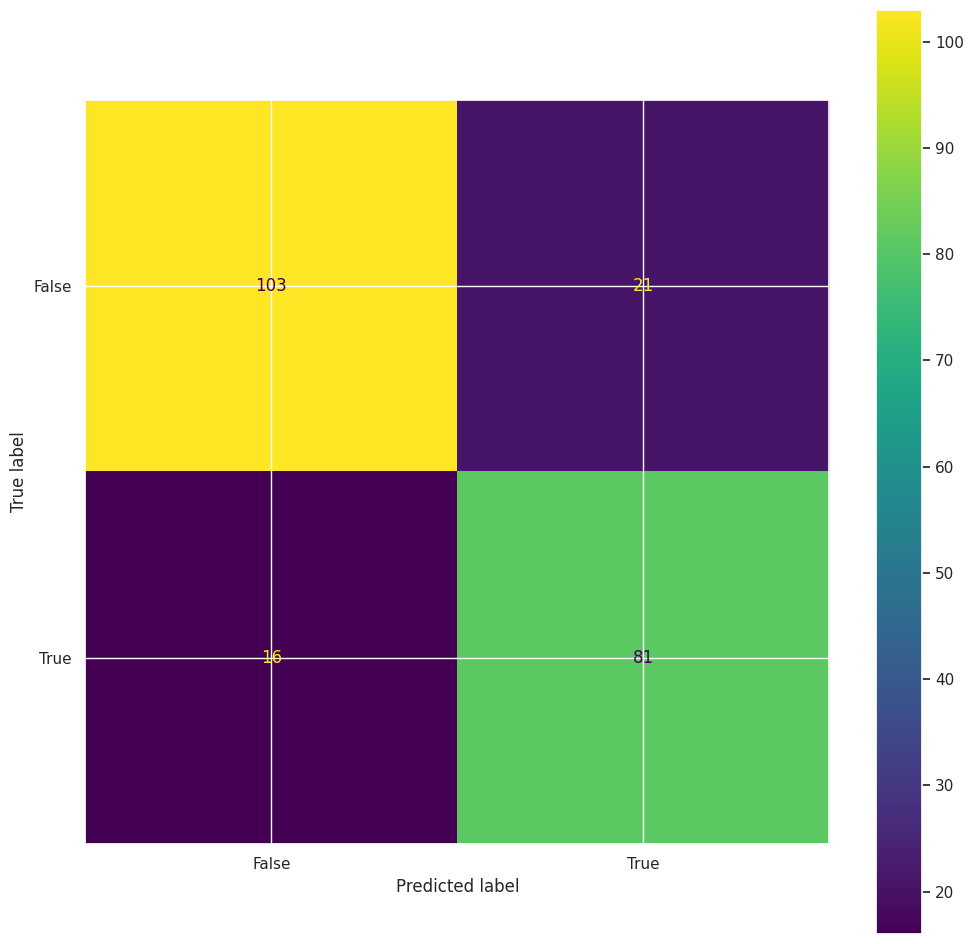

In [144]:
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

- 3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case

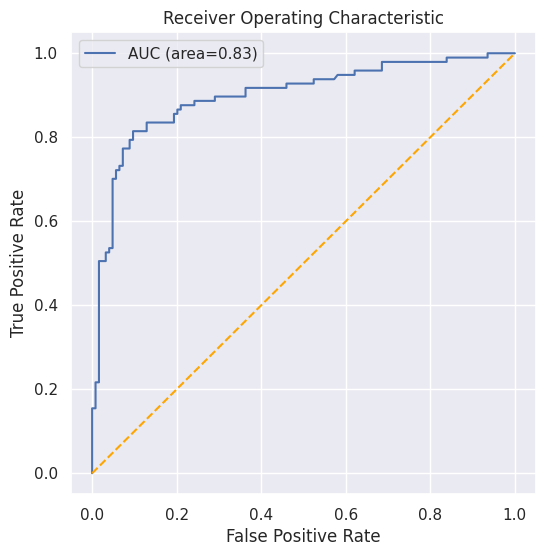

In [145]:
#ROC CURVE

AUC = logit_roc_auc =roc_auc_score(y_test,y_pred)

plt.figure(figsize=(6,6))
fpr ,tpr,thresholds= roc_curve(y_test,logReg_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label ="AUC (area=%0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.savefig("Log_ROC")
plt.show();

In [147]:
#validation croisee pour comparaison finale
validation_croisee = KFold(10) # Pour avoir les données pour une validation croisée avec 10 tas
#Evaluation des scores à chaque itération
scores_logReg= cross_val_score(LogisticRegression(), X, y, cv = validation_croisee)

## Part 2 KNN

- 1. Apply the KNN and predict your model

In [149]:
knn_model=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn_model.fit(X_train,y_train) #Training KNN classifier
y_pred=knn_model.predict(X_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8506787330316742


-  2. Choose the optimal number of neighbors

In [150]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.84
Accuracy for k= 2 is: 0.84
Accuracy for k= 3 is: 0.83
Accuracy for k= 4 is: 0.82
Accuracy for k= 5 is: 0.81
Accuracy for k= 6 is: 0.82
Accuracy for k= 7 is: 0.83
Accuracy for k= 8 is: 0.83
Accuracy for k= 9 is: 0.81
Accuracy for k= 10 is: 0.85
Accuracy for k= 11 is: 0.83
Accuracy for k= 12 is: 0.84
Accuracy for k= 13 is: 0.83
Accuracy for k= 14 is: 0.83
Accuracy for k= 15 is: 0.81
Accuracy for k= 16 is: 0.82
Accuracy for k= 17 is: 0.82
Accuracy for k= 18 is: 0.82
Accuracy for k= 19 is: 0.82
Accuracy for k= 20 is: 0.81
Accuracy for k= 21 is: 0.82
Accuracy for k= 22 is: 0.83
Accuracy for k= 23 is: 0.83
Accuracy for k= 24 is: 0.82
Accuracy for k= 25 is: 0.85
Accuracy for k= 26 is: 0.82
Accuracy for k= 27 is: 0.82
Accuracy for k= 28 is: 0.81
Accuracy for k= 29 is: 0.76


Text(0, 0.5, 'Testing Accuracy')

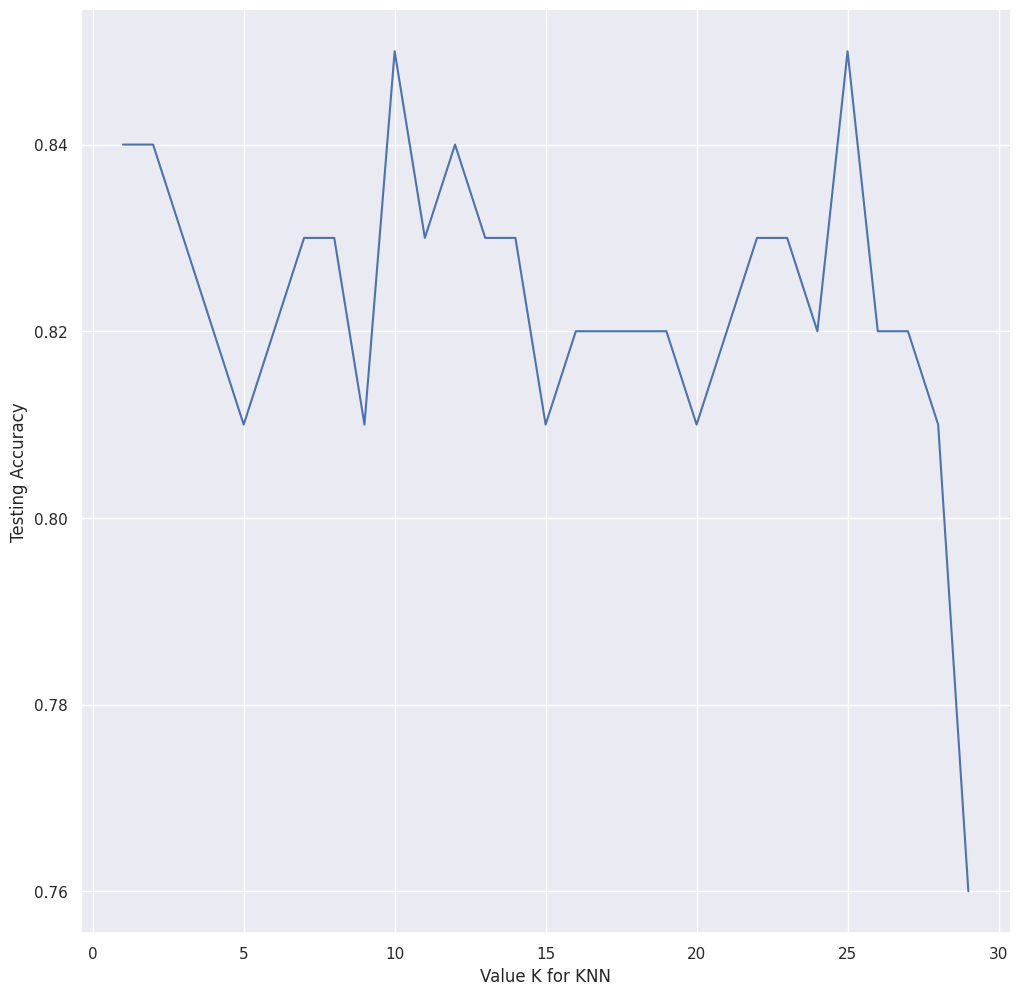

In [94]:
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

meilleurs score obtenu pour k=10 et k= 23

In [148]:
#validation croisee pour comparaison finale
validation_croisee = KFold(10) # Pour avoir les données pour une validation croisée avec 10 tas
#Evaluation des scores à chaque itération
scores_KNN= cross_val_score(KNeighborsClassifier(n_neighbors=23), X, y, cv = validation_croisee)

## Part 3:  Decision tree and random forest

- 1. Apply decision tree and predict you model

In [151]:
#applying tree algorithm
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)   #Fit the classifier with default hyper-parameters
y_pred=tree_model.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7963800904977375


- 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually

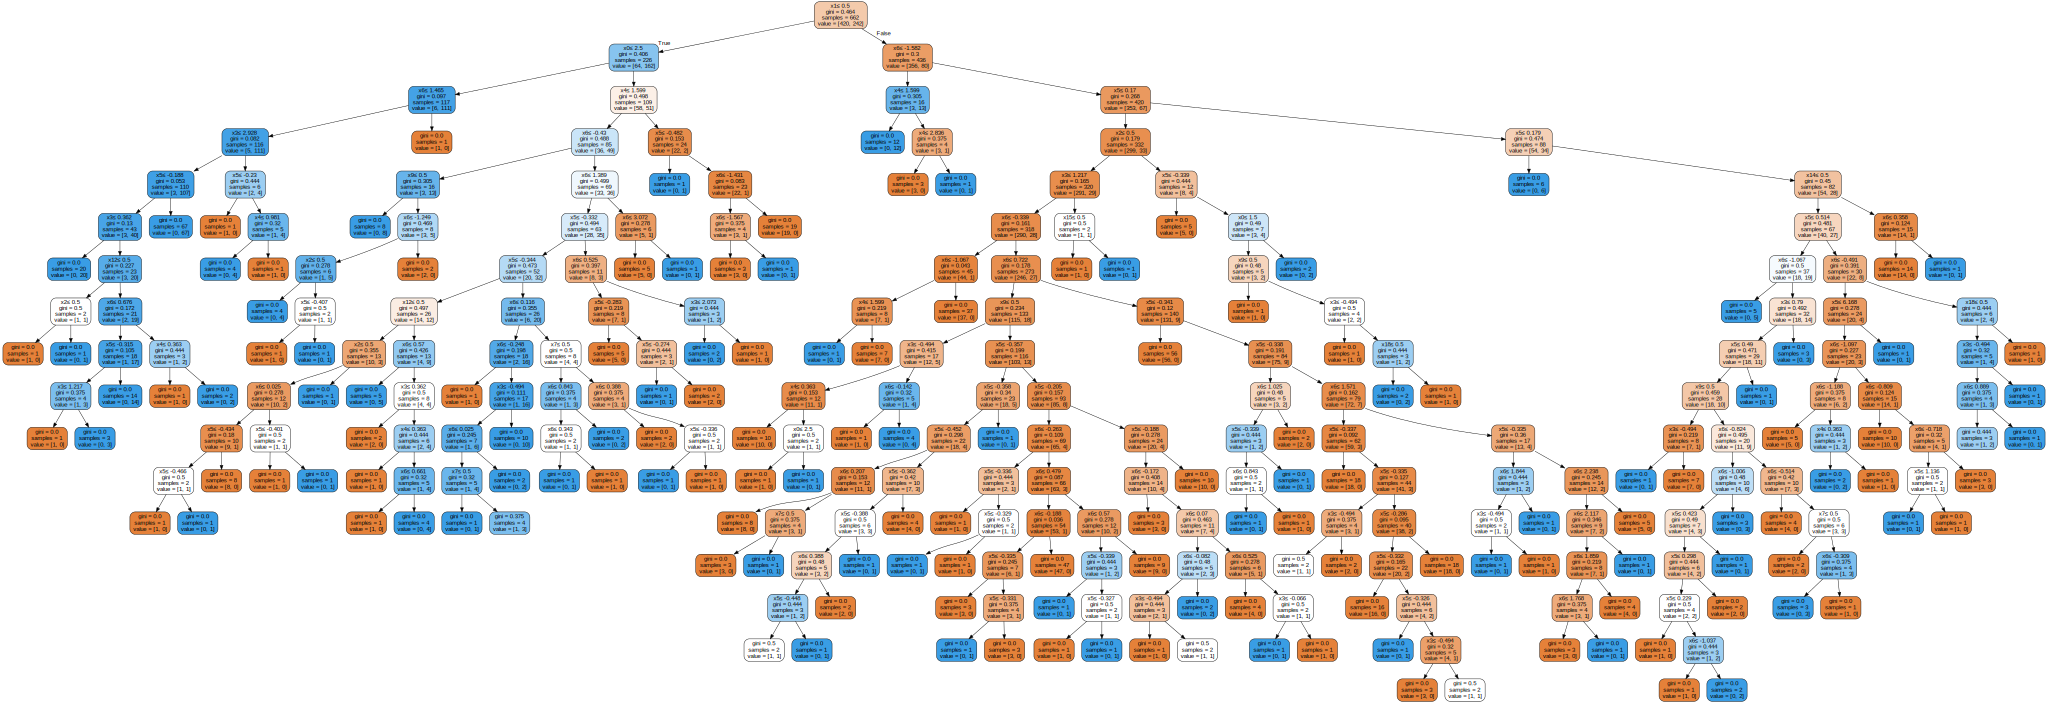

In [152]:
dot_data = tree.export_graphviz(tree_model, out_file=None, filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

- 3. Change the decision tree parameters(change at least two parameters)

In [153]:
tree_model = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5)
tree_model.fit(X_train, y_train)   #Fit the classifier with default hyper-parameters
y_pred=tree_model.predict(X_test)   # evaluating our model


- 4. Calculate the new accuracy and compare it with the previous results.

In [154]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8506787330316742


Nous obtenons un meilleurs score que précedement

In [159]:
#validation croisee pour comparaison finale
validation_croisee = KFold(10) # Pour avoir les données pour une validation croisée avec 10 tas
#Evaluation des scores à chaque itération
scores_Tree= cross_val_score(DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5), X, y, cv = validation_croisee)

- 5. Use random forest then change the number of estimators

In [157]:
RF_model=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
RF_model.fit(X_train, y_train)   #Fit the classifier with default hyper-parameters
y_pred=RF_model.predict(X_test)   # evaluating our model

- 6. Calculate the new accuracy and compare it with the previous result.

In [158]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7963800904977375


In [161]:
#validation croisee pour comparaison finale
validation_croisee = KFold(10) # Pour avoir les données pour une validation croisée avec 10 tas
#Evaluation des scores à chaque itération
scores_RF= cross_val_score(RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), X, y, cv = validation_croisee)

Now to finalize your project, make a summary graph which resume all accuracies of each model(logistic regression, knn Decision tree and random forest) to decide which model is the most performant

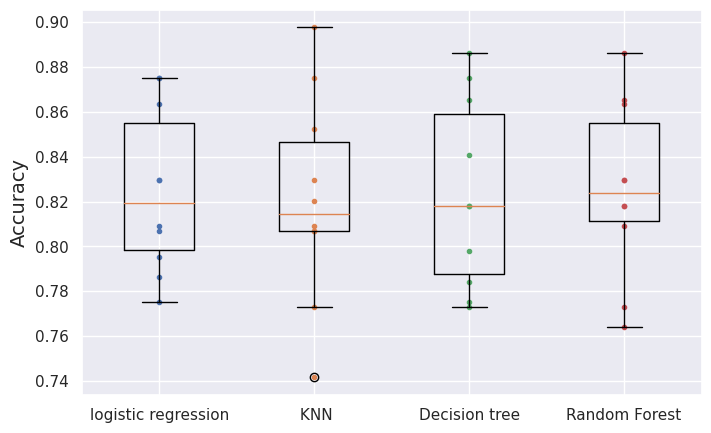

In [162]:
plt.figure(figsize=(8, 5))
plt.plot([1]*10, scores_logReg, ".")
plt.plot([2]*10, scores_KNN, ".")
plt.plot([3]*10, scores_Tree, ".")
plt.plot([4]*10, scores_RF, ".")
plt.boxplot([scores_logReg, scores_KNN, scores_Tree, scores_RF ], labels=("logistic regression"," KNN","Decision tree","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

Conclusion:
Au vue de ces résultats, nous pouvons conclure que le meilleur modèle pour prédire si un passager du Titanic survivra ou non  est le **Random Forest**. Car
Son score en  moyenne est plus élevé que celui des autres. En plus il present moins de variabilité par rapport aux autres.